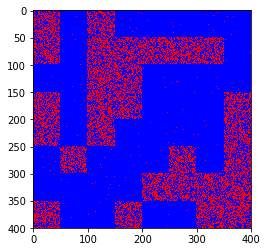

In [11]:
import matplotlib.pyplot as plt
import numpy as np
import random
random.seed(8)
np.random.seed(0)
N = 400
S = 50
X = np.zeros((N, N))
randList = np.random.randint(0,100,1000)

for i in range(N):
    for j in range(N):
        if randList[(i / S) * N / S + (j / S)] % 2 == 0:
            X[i, j] = random.choice([0] * 1 + [1])
        if random.randint(0, 200) == 1:
            X[i, j] = 1 - X[i, j]

plt.imshow(X, cmap = 'bwr')
plt.show()


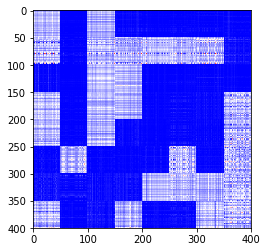

In [12]:
from sklearn.decomposition import NMF
model = NMF(n_components=10, init='random', random_state=0)
W = model.fit_transform(X)
H = model.components_
Y = W.dot(H)
plt.imshow(Y, cmap='bwr')
plt.show()

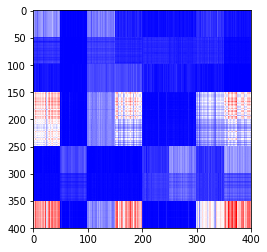

In [13]:
from sklearn.decomposition import LatentDirichletAllocation
lda = LatentDirichletAllocation(n_components=10, max_iter=5,
                                learning_method='online',
                                learning_offset=50.,
                                random_state=0)
lda.fit(X)
Y = lda.transform(X).dot(lda.components_)
plt.imshow(Y, cmap='bwr')
plt.show()

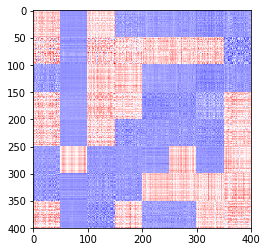

In [14]:
from sklearn.decomposition import TruncatedSVD
svd = TruncatedSVD(n_components=10, n_iter=7, random_state=42)
svd.fit(X)
Y = svd.transform(X).dot(svd.components_)
plt.imshow(Y, cmap='bwr')
plt.show()

INFO:lda:n_documents: 400
INFO:lda:vocab_size: 400
INFO:lda:n_words: 35205
INFO:lda:n_topics: 10
INFO:lda:n_iter: 100
INFO:lda:<0> log likelihood: -315469
INFO:lda:<10> log likelihood: -223425
INFO:lda:<20> log likelihood: -211127
INFO:lda:<30> log likelihood: -206809
INFO:lda:<40> log likelihood: -204005
INFO:lda:<50> log likelihood: -202711
INFO:lda:<60> log likelihood: -202104
INFO:lda:<70> log likelihood: -201772
INFO:lda:<80> log likelihood: -201080
INFO:lda:<90> log likelihood: -201016
INFO:lda:<99> log likelihood: -200768


time: 1.33654403687


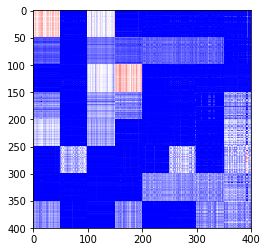

In [20]:
import ctypes
import lda
import time
model = lda.LDA(n_topics=10, n_iter=100)
st = time.time()
model.fit(X.astype('int64'))
print 'time:', time.time() - st
Y = model.doc_topic_.dot(model.topic_word_)
#Y = doc_topic.dot(topic_word)
plt.imshow(Y, cmap='bwr')
plt.show()

time: 0.545971155167


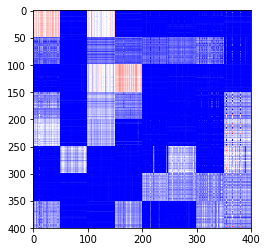

In [22]:
import ldalib
st = time.time()
doc_topic, topic_word = ldalib.lda(X, 10, iter_n = 100)
print 'time:', time.time() - st
Y = doc_topic.dot(topic_word)
plt.imshow(Y, cmap='bwr')
plt.show()